----

### <span style="color:#0b486b">Practical Machine Learning</span>


---


# <span style="color:#0b486b">Assignment Two: Deep Neural Networks, Representation Learning, and Text Analytics</span>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **two** parts 

* Part 1: Deep Feedforward Neural Network **[50 points]**
* Part 2: Word2Vec, text analytics and application **[35 points]**


## <span style="color:#0b486b">Part 1: Deep Feedforward Neural Network </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 50 points]**<span></div>

The first part of this assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials.

*Run the following cell to create necessary subfolders for this assignment. You must **not** modify these codes and **must** run it first*.

In [1]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

The first part of this assignment is to apply DNN to recognize objects from images. You have played with MNIST dataset in your pracs and this should have given you a good sense of how to apply DNN on images for recognition task. 

In this assignment, you are going to work with the **Fashion-MNIST** dataset for *image recognition task*. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples at the visualization task in the next part. The data can be found [here](https://github.com/zalandoresearch/fashion-mnist).


####  <span style="color:red">**Question 1.1**</span>. Load the data.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div>

Enter the missing codes in the following cell to complete this question.

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Print out the size of x_train, y_train, x_test, y_test
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
# INSERT YOUR CODE HERE


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


####  <span style="color:red">**Question 1.2**</span>. Print out the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [5]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
import numpy as np
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names
len(np.unique(y_test))

10

####  <span style="color:red">**Question 1.3**</span>. Display 100  images from the train set in the form of `10x10` matrix, each row showing 10 *random* images of a label. You might decide to use the function `display_images` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[4 points]**</span></div> 

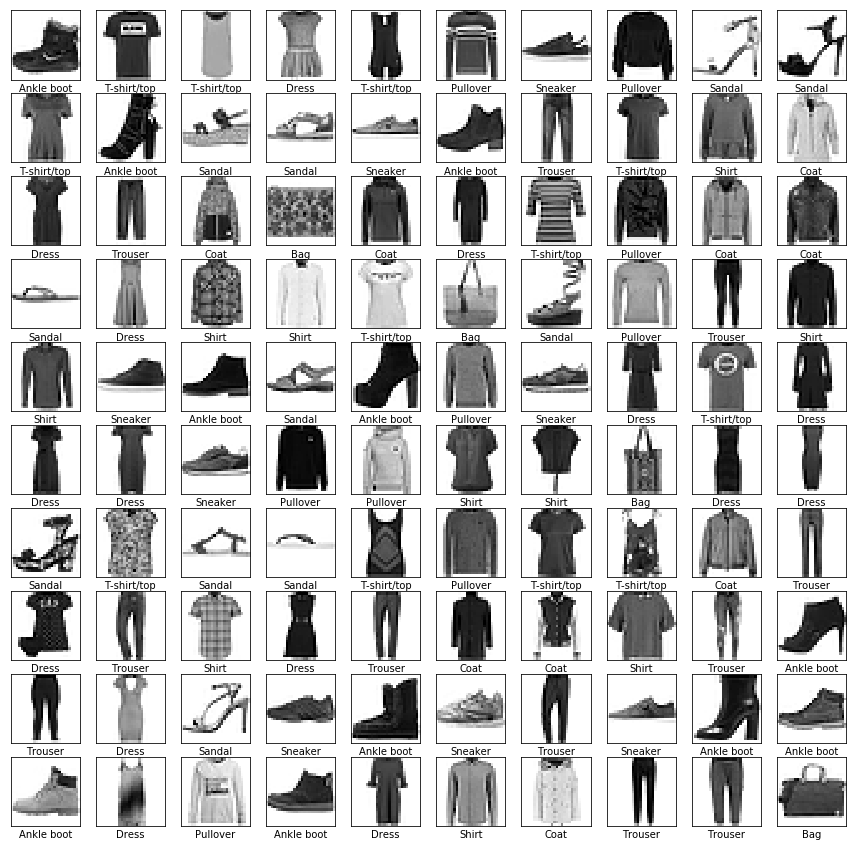

In [9]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

####  <span style="color:red">**Question 1.4**</span>. Use the *deep feedforward neural network* as the classifier to perform images classification task.

The total marks for this question is <span style="color:red">**[32 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to reshape the variable `x` storing features from `[num_samples, width, height]` dimension to `[num_samples, num_features]` with `num_features = width x height`. ** (*Hint*: you might want to use the `reshape()' function)
<div style="text-align: right"> <span style="color:red">**[3 points]**</span> </div>

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
X_train = x_train.transpose(2,0,1).reshape(3,-1)

In training the DNN, scaling data is important. The pixel intensities of images are in the range of [0, 255], which makes the neural network difficult to learn.

**Rescale the input data into the range of [0, 1]**
<div style="text-align: right"> 
<span style="color:red">**[2 points]**</span> </div>

In [19]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.        , 0.        , ..., 0.02745098, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<span style="color:red">**(b)**</span> **Construct a deep feedforward neural network with the following architecture:**

* An input layer followed by *two* hidden layers, each with *500* hidden units, and an *output* layer;
* *ReLU* activations for neurons in each hidden layer;
* Training with gradient descent optimizer with learning rate **0.0011**, batch size 128 and 50 epochs.

(*Hint*: *this question heavily relies on the knowledge you've learned from lab session in week 5 and 6. You are encouraged to revise these materials for this question*)

<div style="text-align: right"> <span style="color:red">**[20 points]**</span> </div>

In [154]:
# merge all summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all# INSERT YOUR CODE HERE

init = tf.global_variables_initializer()
saver = tf.train.Saver()

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())


In [131]:
# These parameters are global across models
n_inputs = 28*28  # image dimensions
n_outputs = 10 # total of 10 fashion items


# shuffle_batch() shuffle the examples in a batch before training
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# flatten
X_train_raw = x_train.reshape(len(x_train), n_inputs)
y_train = y_train
X_test_raw = x_test.reshape(len(x_test), n_inputs)
y_test = y_test


# use standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_raw)

X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# spilt training into validation and training
X_val = X_train[:10000, :]
X_train = X_train[10000:, :]

y_val = y_train[:10000]
y_train = y_train[10000:]

c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
tf.reset_default_graph() # reset model

learning_rate = 0.0011
n_hidden1 = 500
n_hidden2 = 500

# Construct placeholder for the input layer
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", 
                              activation = tf.nn.leaky_relu,
                             kernel_initializer = tf.contrib.layers.xavier_initializer(seed=42))
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", 
                              activation = tf.nn.leaky_relu,
                             kernel_initializer = tf.contrib.layers.xavier_initializer(seed=42))
    logits = tf.layers.dense(hidden2, n_outputs, name = "outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


<span style="color:red">**(c)**</span> **You are now required write code to train the DNN.** Write codes in the following cell. <span style="color:red">**[5 points]**</span> </div>

In [136]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# number of epochs and batch sizes
n_epochs = 50
batch_size = 128

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    
        print(epoch, "Validation Accuracy:", acc_val, "Test Accuracy:", acc_test)
    save_path = saver.save(sess, "models/dnn0.ckpt")

0 Validation Accuracy: 0.7289 Test Accuracy: 0.716
1 Validation Accuracy: 0.7638 Test Accuracy: 0.7528
2 Validation Accuracy: 0.7831 Test Accuracy: 0.7702
3 Validation Accuracy: 0.796 Test Accuracy: 0.7837
4 Validation Accuracy: 0.8042 Test Accuracy: 0.7935
5 Validation Accuracy: 0.8114 Test Accuracy: 0.7987
6 Validation Accuracy: 0.8171 Test Accuracy: 0.8042
7 Validation Accuracy: 0.8205 Test Accuracy: 0.8073
8 Validation Accuracy: 0.8244 Test Accuracy: 0.8124
9 Validation Accuracy: 0.8279 Test Accuracy: 0.815
10 Validation Accuracy: 0.8314 Test Accuracy: 0.8188
11 Validation Accuracy: 0.8343 Test Accuracy: 0.8209
12 Validation Accuracy: 0.8374 Test Accuracy: 0.8243
13 Validation Accuracy: 0.8395 Test Accuracy: 0.8256
14 Validation Accuracy: 0.841 Test Accuracy: 0.8293
15 Validation Accuracy: 0.8429 Test Accuracy: 0.8299
16 Validation Accuracy: 0.8444 Test Accuracy: 0.8321
17 Validation Accuracy: 0.8452 Test Accuracy: 0.8318
18 Validation Accuracy: 0.8485 Test Accuracy: 0.8341
19 Vali

<span style="color:red">**(d)**</span> **Reuse the code you have developed in (c), set learning rate to 0.01, rerun the training/test procedure and print out the new training and test accuraries.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [138]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

learning_rate = 0.01
# number of epochs and batch sizes
n_epochs = 50
batch_size = 128

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    
        print(epoch, "Validation Accuracy:", acc_val, "Test Accuracy:", acc_test)
    

0 Validation Accuracy: 0.7233 Test Accuracy: 0.7221
1 Validation Accuracy: 0.7615 Test Accuracy: 0.7586
2 Validation Accuracy: 0.78 Test Accuracy: 0.7753
3 Validation Accuracy: 0.7929 Test Accuracy: 0.788
4 Validation Accuracy: 0.8028 Test Accuracy: 0.796
5 Validation Accuracy: 0.8093 Test Accuracy: 0.8034
6 Validation Accuracy: 0.8165 Test Accuracy: 0.8098
7 Validation Accuracy: 0.8222 Test Accuracy: 0.8139
8 Validation Accuracy: 0.8259 Test Accuracy: 0.8167
9 Validation Accuracy: 0.8301 Test Accuracy: 0.8213
10 Validation Accuracy: 0.8341 Test Accuracy: 0.8223
11 Validation Accuracy: 0.8377 Test Accuracy: 0.8254
12 Validation Accuracy: 0.8381 Test Accuracy: 0.8256
13 Validation Accuracy: 0.8419 Test Accuracy: 0.8267
14 Validation Accuracy: 0.8434 Test Accuracy: 0.8281
15 Validation Accuracy: 0.8448 Test Accuracy: 0.829
16 Validation Accuracy: 0.845 Test Accuracy: 0.8305
17 Validation Accuracy: 0.8465 Test Accuracy: 0.8315
18 Validation Accuracy: 0.8485 Test Accuracy: 0.8322
19 Valida

####  <span style="color:red">**Question 1.5**</span> When training a deep learning model in general, and DNN in particular, the choice of the optimizer plays an important role. We have learned about different methods for optimizing a DNN. Apart from being able to understan the pros and cons of each method, a good practice is the skill to test and screen over different optimizers.

**This question requires you to use the code developed in Question 1.4(d), and use the following optimizers already provided in TensorFlow with the following setting: **

* [Momentum Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer) with momentum 0.9, learning rate 0.01 and Nesterov update;
* [RMSProp Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) with learning rate 0.001;
* [AdaGrad Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer) with learning rate 0.01;
* [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) with learning rate 0.001.


<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [139]:
# YOU ARE REQUIRED TO INSERT YOUR CODES USING *Momentum* Optimizer IN THIS CELL
tf.train.MomentumOptimizer(momentum = 0.9, learning_rate= 0.01)

In [140]:
# YOU ARE REQUIRED TO INSERT YOUR CODES FOR *RMSProp* IN THIS CELL
tf.train.RMSPropOptimizer( learning_rate= 0.01)

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES FOR AdaGrad IN THIS CELL
tf.train.AdagradOptimizer( learning_rate= 0.01)

In [141]:
# YOU ARE REQUIRED TO INSERT YOUR CODES FOR Adam IN THIS CELL
tf.train.AdamOptimizer( learning_rate= 0.01)

**Which optimizer gives the best performance? Write your observations and any lessons learned.**

*[INSERT YOUR ANSWER HERE]*

---

## <span style="color:#0b486b">Part 2: Word2Vec, Text Analytics and Application</span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 35 points]**<span></div>


In this part, you are going to use Word2Vec for document classification on [20 Newsgroups](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html) dataset. This dataset is a collection of messages collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name. The list of newsgroups from which the messages were chosen is as follows:

`
alt.atheism
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
soc.religion.christian
comp.sys.ibm.pc.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.windows.x
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.space
sci.med
misc.forsale
`

### <span style="color:#0b486b"> Download the dataset and data pre-processing</span>

####  <span style="color:red">**Question 2.1**</span> Your first task is to run the following code to download the dataset.

<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all', remove=('headers'))

####  <span style="color:red">**Question 2.2**</span>. Print out the total number of documents, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [89]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
newsgroups_all.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

####  <span style="color:red">**Question 2.3**</span>. Convert the documents into a list of tokens using the function `gensim.utils.tokenize`.
<div style="text-align: right"><span style="color:red">**[3 point]**</span></div>


In [147]:
import gensim

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# gensim.utils.tokenize(
tocken = []
for v in newsgroups_all['data']:
    tocken.append(list(gensim.utils.tokenize(v)))

# newtoken = []
# for v in tocken:
#     newtoken += v
print(tocken[:10])

[['I', 'am', 'sure', 'some', 'bashers', 'of', 'Pens', 'fans', 'are', 'pretty', 'confused', 'about', 'the', 'lack', 'of', 'any', 'kind', 'of', 'posts', 'about', 'the', 'recent', 'Pens', 'massacre', 'of', 'the', 'Devils', 'Actually', 'I', 'am', 'bit', 'puzzled', 'too', 'and', 'a', 'bit', 'relieved', 'However', 'I', 'am', 'going', 'to', 'put', 'an', 'end', 'to', 'non', 'PIttsburghers', 'relief', 'with', 'a', 'bit', 'of', 'praise', 'for', 'the', 'Pens', 'Man', 'they', 'are', 'killing', 'those', 'Devils', 'worse', 'than', 'I', 'thought', 'Jagr', 'just', 'showed', 'you', 'why', 'he', 'is', 'much', 'better', 'than', 'his', 'regular', 'season', 'stats', 'He', 'is', 'also', 'a', 'lot', 'fo', 'fun', 'to', 'watch', 'in', 'the', 'playoffs', 'Bowman', 'should', 'let', 'JAgr', 'have', 'a', 'lot', 'of', 'fun', 'in', 'the', 'next', 'couple', 'of', 'games', 'since', 'the', 'Pens', 'are', 'going', 'to', 'beat', 'the', 'pulp', 'out', 'of', 'Jersey', 'anyway', 'I', 'was', 'very', 'disappointed', 'not', 't

### <span style="color:#0b486b"> Train the model </span>


####  <span style="color:red">**Question 2.4**</span>. Train gensim's word2vec model.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div>

* Train gensim's word2vec model with the settings of:
    * The dimensionality of the feature vectors: `size=100`,
    * The maximum distance between the current and predicted word within a sentence: `window=5`,
    * Minimum frequence (ignore all words with total frequency lower than this): `min_count=5`,


In [149]:
from gensim.models import Word2Vec

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

model = Word2Vec(tocken[:500], size=100, window=5, min_count=5, workers=4)
model

* Save the trained model to a file named "20_newsgroups.gensim"

In [150]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
model.save("20_newsgroups.gensim")

In [151]:
words = list(model.wv.vocab)
print(words)

['I', 'am', 'sure', 'some', 'of', 'Pens', 'fans', 'are', 'pretty', 'confused', 'about', 'the', 'lack', 'any', 'kind', 'posts', 'recent', 'massacre', 'Devils', 'Actually', 'bit', 'too', 'and', 'a', 'However', 'going', 'to', 'put', 'an', 'end', 'non', 'with', 'for', 'Man', 'they', 'killing', 'those', 'worse', 'than', 'thought', 'just', 'showed', 'you', 'why', 'he', 'is', 'much', 'better', 'his', 'regular', 'season', 'He', 'also', 'lot', 'fun', 'watch', 'in', 'playoffs', 'should', 'let', 'have', 'next', 'couple', 'games', 'since', 'out', 'anyway', 'was', 'very', 'not', 'see', 'final', 'game', 'My', 'market', 'high', 'performance', 'video', 'card', 'that', 'supports', 'VESA', 'local', 'bus', 'MB', 'RAM', 'Does', 'anyone', 'suggestions', 'ideas', 'on', 'Pro', 'Local', 'Bus', 'ATI', 'Graphics', 'Any', 'other', 'VLB', 'Please', 'post', 'or', 'email', 'Thank', 'Matt', 'Matthew', 'B', 'edu', 'Now', 'King', 'heaven', 'because', 'everything', 'does', 'right', 'all', 'ways', 'C', 'The', 'student',

####  <span style="color:red">**Question 2.5**</span>. Print out the vocabulary size (number of words in vocabulary).
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [152]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
len(set(words))

3022

####  <span style="color:red">**Question 2.6**</span>. Using the embedding results, calculate and print out the ten most similar words to word 'law' and their corresponding similarity scores.<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [153]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# model = gensim.models.KeyedVectors.load_word2vec_format('20_newsgroups.gensim', binary=True)
model.most_similar(positive=['law'], topn=10)

c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('government', 0.9998255372047424),
 ('very', 0.9998065233230591),
 ('enough', 0.9998049736022949),
 ('first', 0.999788761138916),
 ('even', 0.9997776746749878),
 ('look', 0.9997581839561462),
 ('Sabbath', 0.9997439980506897),
 ('help', 0.9997409582138062),
 ('program', 0.9997403621673584),
 ('religion', 0.9997381567955017)]

### <span style="color:#0b486b"> Evaluate the embeddings using classification </span>

Now we investigate the quality of embedded vectors via document classification task. We have learned the embeddings for words, but not for documents yet, thus we need to find a way to extract the document embeddings from word embeddings. We are going to try two approaches:
* Taking the **sum** of vectors of all words in the document; or
* Taking the **average** of vectors of all words in the document.

####  <span style="color:red">**Question 2.7**</span>. Extract document vectors using `sum`.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

* Remove all ***empty*** documents. A document is empty if it does not contain any word in the vocabulary;
* Extract document vectors and save to variable `x`;
* Save the corresponding labels to variable `y`.

In [155]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs


extract_doc2vec(newsgroups_all['data'], model)

c:\users\deepak patel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.


[]

####  <span style="color:red">**Question 2.8**</span>. Print out the number of documents retained after removing empty documents.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [160]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
newsgroups_all.keys()


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

#### <span style="color:red">**Question 2.9**</span>. Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [172]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

X = newsgroups_all.data
y = newsgroups_all.target
sss = StratifiedShuffleSplit(test_size=0.3, random_state=0)
sss.get_n_splits(X, y)

10

#### <span style="color:red">**Question 2.10**</span>. **Use [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as the classifier, train and test the model using the training and test datasets from the previous step. Report the training accuracy and testing accuracy.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [176]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
# Grab just two categories from the 20 newsgroups dataset
categories=['sci.space', 'rec.autos']

# Get training data
ngd = fetch_20newsgroups(subset='train', categories=categories)
X_train = ngd.data
y_train = ngd.target


# Use pipeline for easy extensibility
steps = [
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(penalty='l1', C=10))
]
pipeline = Pipeline(steps)

# Fit and assess training performance
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_train)
print("Classification accuracy on training data: %.2f" % pipeline.score(X_train, y_train))

# Performance on test data
ngd = fetch_20newsgroups(subset='test', categories=categories)
test_score = pipeline.score(ngd.data, ngd.target)
print("Classification accuracy on test data: %.2f" % test_score)

# Print largest coefficients
vec, clf = pipeline.named_steps['vectorizer'], pipeline.named_steps['classifier']
coefs = pd.Series(clf.coef_[0], index=vec.get_feature_names())
print("\n20 most discriminating words:")
print(coefs[coefs.abs().sort_values(ascending=False).index][:20])

Classification accuracy on training data: 1.00
Classification accuracy on test data: 0.96

20 most discriminating words:
car       -57.348015
space      54.312930
cars      -36.330279
orbit      33.608471
digex      27.543523
moon       25.906330
nasa       19.906688
launch     16.304546
my        -14.526057
solar      14.464402
dc         13.382087
sci        11.977805
sky        11.706673
be         11.642181
flight     11.618531
rockets    11.164104
of         11.024090
toyota    -10.474869
auto      -10.145794
com       -10.009558
dtype: float64


####  <span style="color:red">**Question 2.11**</span>. Now modify the `extract_doc2vec` function above to  extract document vectors using `average`, instead of `sum`, and repeat the experiment: split the data, train and test using Logistic Regression.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs

# INSERT YOUR CODE HERE
extract_doc2vec(newsgroups_all['data'], model)


####  <span style="color:red">**Question 2.12**</span>. Which representation (sum or average doc vector) gives the best performance? Write your observations and any lessons learned.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 



from the observation it is clear that sum gives the best performance. During solving this assignment i've learned a lot of things in deap learning. and i also learned the practical implementation on the real world dataset 20newsgroup. i enjoyed learning and solving this assignment.

--- 
<div style="text-align: center"> <span style="color:black">**END OF ASSIGNMENT**</span> </div>